<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import spacy
from bs4 import BeautifulSoup
import squarify
from collections import Counter

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [41]:
from urllib.request import urlopen, Request

In [75]:
# All pages
pages = ['https://www.indeed.com/jobs?q=data+scientist&l=',
         'https://www.indeed.com/jobs?q=data+scientist&start=10',
         'https://www.indeed.com/jobs?q=data+scientist&start=20',
         'https://www.indeed.com/jobs?q=data+scientist&start=30',
         'https://www.indeed.com/jobs?q=data+scientist&start=40',
         'https://www.indeed.com/jobs?q=data+scientist&start=50',
         'https://www.indeed.com/jobs?q=data+scientist&start=60',
         'https://www.indeed.com/jobs?q=data+scientist&start=70',
         'https://www.indeed.com/jobs?q=data+scientist&start=80',
         'https://www.indeed.com/jobs?q=data+scientist&start=90',
         'https://www.indeed.com/jobs?q=data+scientist&start=100']

In [76]:
# Instantiate jobs list
jobs = []

In [77]:
# Pull the link for jobs
for page in pages:
    html = urlopen(page)
    soup = BeautifulSoup(html, 'html.parser')
    
    for link in soup.find_all('a', {'class':'jobtitle turnstileLink'}):
        jobs.append(link.attrs['href'])

In [78]:
# Clean clean clean
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)
        
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)
        
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)
        
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)
        
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)
        
for job in jobs:
    if job.startswith('/pagead'):
        jobs.remove(job)

In [80]:
# add prefix
jobs = ['https://www.indeed.com' + job for job in jobs]

In [89]:
texts = []

In [90]:
for job in jobs:
    html = urlopen(job)
    soup = BeautifulSoup(html, 'html.parser')
    
    texts.append(soup.find_all('div', {'class':'jobsearch-jobDescriptionText'}))

In [96]:
texts = [str(text)[1:-1] for text in texts]

In [97]:
texts[0]

'<div class="jobsearch-jobDescriptionText" id="jobDescriptionText"><div><b>Introduction</b><br/>\nAt IBM we have an amazing opportunity to transform the world with cognitive technology. By using the vast amounts of information available today to identify new patterns and make new discoveries, we are helping cities become smarter, hospitals transform patient care, financial institutions minimize risk, and pharmaceuticals find cures for rare diseases.\n<br/>\n<br/>\nData scientists work with enterprise leaders and key decision makers to solve business problems by preparing, analyzing, and understanding data to deliver insight, predict emerging trends, and provide recommendations to optimize results. Data scientists use a variety of data (structured, unstructured, IoT streaming), analytics, AI tools, and programming languages often using a cloud infrastructure to handle the volume and veracity of data streams.<br/>\n<br/>\nArmed with data, modeling expertise, and analytic results, the dat

## 2) Use Spacy to tokenize / clean the listings 

In [101]:
# df = pd.read_csv('data/job_listings.csv')
# df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [102]:
df=pd.DataFrame(texts, columns = ['description'])
df.head()

,description
0,"<div class=""jobsearch-jobDescriptionText"" id=""..."
1,"<div class=""jobsearch-jobDescriptionText"" id=""..."
2,"<div class=""jobsearch-jobDescriptionText"" id=""..."
3,"<div class=""jobsearch-jobDescriptionText"" id=""..."
4,"<div class=""jobsearch-jobDescriptionText"" id=""..."


In [103]:
nlp = spacy.load("en_core_web_md")

In [104]:
def clean(text):
    # Clean
    clean_text = BeautifulSoup(text, "lxml").text
    # clean_text = clean_text[2:]
    clean_text = re.sub(r'\\n', ' ', clean_text)
    clean_text = re.sub(r'/', ' ', clean_text)
    clean_text = re.sub(r'[^a-zA-Z ^0-9]', '', clean_text)
    
    return clean_text

In [105]:
def tokenize(text):
    # Tokenize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    if ' ' in tokens:
        tokens.remove(' ')
    if '  ' in tokens:
        tokens.remove('  ')
    return tokens

In [106]:
df['tokens'] = df['description'].apply(clean).apply(tokenize)

In [107]:
df.head()

,description,tokens
0,"<div class=""jobsearch-jobDescriptionText"" id=""...","[IntroductionAt, IBM, amazing, opportunity, tr..."
1,"<div class=""jobsearch-jobDescriptionText"" id=""...","[NCRNCR, Corporation, NYSE, NCR, lead, softwar..."
2,"<div class=""jobsearch-jobDescriptionText"" id=""...","[collaborate, assigned, department, provide, a..."
3,"<div class=""jobsearch-jobDescriptionText"" id=""...","[Sr, Data, Scientist, willwork, client, mitiga..."
4,"<div class=""jobsearch-jobDescriptionText"" id=""...","[Awesemocom, fantasy, sport, website, dedicate..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [108]:
# send clean text to list
text = df['description'].apply(clean).tolist()

In [109]:
# Create the transformer
vect = CountVectorizer()

In [110]:
# tokenize and build vocab
vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [111]:
# transform text
dtm = vect.transform(text)

In [112]:
# send to df
dtm_df = pd.DataFrame(dtm.todense(), columns = vect.get_feature_names())

In [113]:
dtm_df.head()

,0126,07,10,100,1000,10000000,1012,10500000,106585,108000squarefootfacility,...,youtube,youve,youwhat,youwhy,yrs,zelus,zero,zilliants,zone,zoomin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [114]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [115]:
# Use the Function
wc = count(df['tokens'])

In [116]:
# The top one is blank
top21 = wc[wc['rank'] <= 21]

In [117]:
# Get rid of blank token
top20 = top21.iloc[1:]

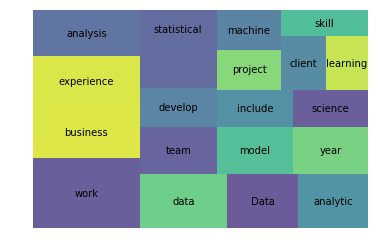

In [118]:
# Squarify plot
squarify.plot(sizes=top20['pct_total'], label=top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [119]:
# Instantiate Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [120]:
# Create a vocab and get word counts per doc
sparse = tfidf.fit_transform(text)

In [121]:
# send to df
tfidf_dtm = pd.DataFrame(sparse.todense(), columns = tfidf.get_feature_names())

In [122]:
tfidf_dtm.head()

,0126,07,10,100,1000,10000000,1012,10500000,106585,108000squarefootfacility,...,youtube,youve,youwhat,youwhy,yrs,zelus,zero,zilliants,zone,zoomin
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.125494,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [123]:
# Instantiate model
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(tfidf_dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [124]:
# Query for closest neighbors
nn.kneighbors([tfidf_dtm.iloc[0]])

(array([[0.        , 0.40807991, 1.26840465, 1.28001387, 1.28446897]]),
 array([[  0,  10,  60, 101,  35]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 